# Assignment 1
## Task 2
### Sample 100 uniformly distributed random vectors from the box [-1, 1]^d for d = 2

In [26]:
import numpy as np

n_samps = 100
d = 2

# generate array with samples columns and d rows, corresponding to 
# n_samps samples of vectors with dimension d with range [-1, 1]
X = 2 * np.random.rand(d, n_samps) - 1

### For each vector determine minimum angle to all other vectors. Then compute the average of minimum angles.

In [45]:
import math

# calculates angle between two vectors
def ang(x, y):
    return math.acos(np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y)))

# determine minimum angle between single vector v and array containing 
# multiple vectors X
def min_ang(v, X):
    angs = []
    for j in range(0, np.shape(X)[1]):
        angs.append(ang(v, X[:, j]))
    return min(angs)

# compute average of minimum angles
def avg_min_ang(X):
    # first calculate minimum angles for each vector in array
    min_angs = []
    for j in range(0, np.shape(X)[1]):
        v = X[:, j]
        # Set D as array with vector v deleted
        D = np.delete(X, j, 1)
        min_angs.append(min_ang(v, D))
    # now return average
    return np.mean(min_angs)

# Compute average of minimum angles
avg_min_ang(X)

0.03137244310075001

### Repeat for d = 1, ..., 1000 and plot average minimum angle against dimension.

In [46]:
# function which takes in as input n_samps and dimension d and returns 
# the average of the minimum cosine similarities for each vector w.r.t. 
# other vectors from sample array, i.e. maps the inputs to the average
# of the minimum of the cosine similarities
def map_avg_min_ang(n_samps, d):
    X = 2 * np.random.rand(d, n_samps) - 1
    return avg_min_ang(X)

# generate vector of d's D to test
min_d = 1
max_d = 100
D = range(min_d, max_d + 1)
n_samps = 100

# map vector of D's to average minimum cosine similarities
S = [map_avg_min_ang(n_samps, d) for d in D]

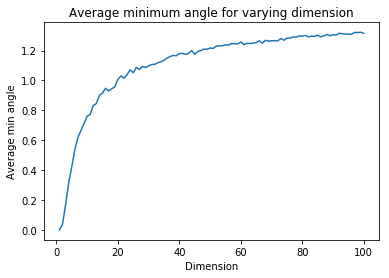

In [47]:
import matplotlib.pyplot as plt
plt.plot(D, S)
plt.title('Average minimum angle for varying dimension')
plt.xlabel('Dimension')
plt.ylabel('Average min angle')
plt.show()

### How would you interpret this result?
As dimension increases, the average minimum angle increases. This means that 2 randomly samples vectors in d-dimensional space are likely to be  more and more perpendicular as d increases.

Note: d has been set to 100 in this case, not 1000... In final copy set this to 1000.

### Does the result change if the sample size increases?

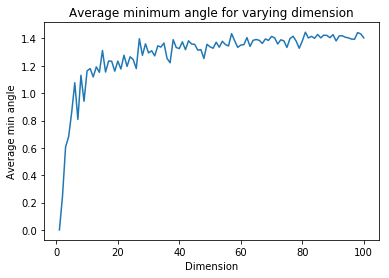

In [50]:
# generate vector of d's D to test
min_d = 1
max_d = 100
D = range(min_d, max_d + 1)
n_samps = 10

# map vector of D's to average minimum cosine similarities
S = [map_avg_min_ang(n_samps, d) for d in D]

# plot
plt.plot(D, S)
plt.title('Average minimum angle for varying dimension')
plt.xlabel('Dimension')
plt.ylabel('Average min angle')
plt.show()

As the number of samples increases, the estimated average of the minimum angle approaches the true expected value. 

Note: number of samples was decreased here due to computational complexity of increasing number of samples... Increase for final copy.